<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

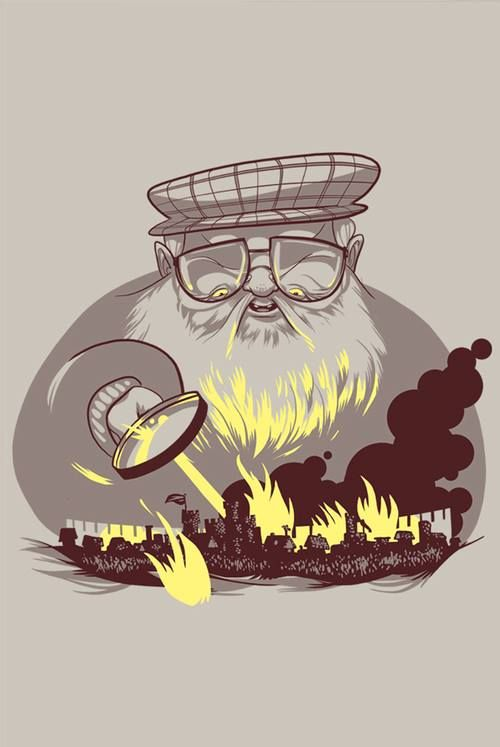

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 71.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 86.9MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/game_of_thrones_test.csv /content/drive/MyDrive
!cp /content/game_of_thrones_train.csv /content/drive/MyDrive

cp: cannot stat '/content/game_of_thrones_test.csv': No such file or directory
cp: cannot stat '/content/game_of_thrones_train.csv': No such file or directory


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [137]:
data =  pd.read_csv("/content/drive/MyDrive/game_of_thrones_train.csv", index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [138]:
data.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,0,0,0,0,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,1,0,1,1,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,1,1,0,0,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [139]:
df = data[data['culture'].notna()]
dict = pd.Series(df.culture.values,index=df.house).to_dict()


In [140]:
 data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
house,381
book1,0
book2,0
book3,0
book4,0


In [141]:
data["culture"] = data["house"].map(dict)
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Dothraki,NaN,NaN,0,0,0,0,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,Vale,82.0,House Arryn,0,0,0,0,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Dothraki,NaN,NaN,1,0,1,1,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,Dothraki,NaN,NaN,1,1,0,0,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [142]:
data[data['house'].isna()]

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Dothraki,NaN,NaN,0,0,0,0,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
6,Tommen Baratheon,NaN,1,Dothraki,NaN,NaN,0,0,0,0,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
8,Viserys I Targaryen,NaN,1,Dothraki,NaN,NaN,0,0,0,0,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,1,Dothraki,NaN,NaN,0,0,1,0,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
12,Will (orphan),NaN,0,Dothraki,NaN,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.003344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,Mag Mar Tun Doh Weg,NaN,1,Dothraki,NaN,NaN,0,0,1,1,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1549,Mago,Bloodrider,0,Dothraki,NaN,NaN,1,0,1,1,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.033445,1
1551,Marillion,NaN,1,Dothraki,279.0,NaN,1,1,1,1,...,NaN,NaN,NaN,NaN,0,0,21.0,0,0.143813,0


In [143]:
import numpy as np
data['house'] = np.where(data['house'].isnull() & data['name'].str.contains(' '),data['name'].apply(lambda x: 'House ' + x.split()[-1] if x.split()[-1][0].isupper() else 'Other'),data['house'])
data['house'] = data['house'].fillna('Other')

Среднее = 35.29032258064516
Медиана = 24.0


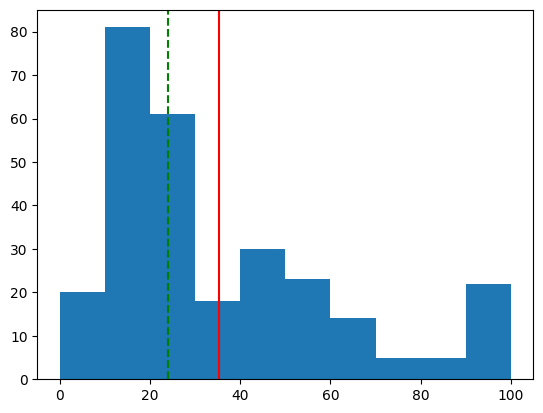

In [144]:
mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее = {mean_Age}")
print(f"Медиана = {median_Age}")
plt.hist(data['age'])
plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')

plt.show()

In [146]:
age = data[data['age'].notna()]
data.loc[data['age'].isnull(), 'age']=age['age'].median()
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Dothraki,NaN,House Targaryen,0,0,0,0,...,1.0,0.0,0.0,NaN,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,...,NaN,NaN,NaN,NaN,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,Vale,82.0,House Arryn,0,0,0,0,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Dothraki,NaN,Other,1,0,1,1,...,NaN,NaN,NaN,NaN,0,1,24.0,0,0.160535,1
1554,Masha Heddle,NaN,0,Dothraki,NaN,House Heddle,1,1,0,0,...,NaN,NaN,NaN,NaN,0,0,24.0,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,...,NaN,NaN,NaN,NaN,0,0,24.0,0,0.076923,0


In [158]:
data.drop(columns=['dateOfBirth', 'title', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,Dothraki,House Targaryen,0,0,0,0,0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,1,Other,House Swyft,0,0,0,1,0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,0,Vale,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,1,Dothraki,Other,1,0,1,1,0,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,0,Dothraki,House Heddle,1,1,0,0,0,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,1,Other,House Seaworth,0,1,1,1,1,0,0,24.0,0,0.076923,0,0,0


In [147]:
 data.isna().sum()

,0
name,0
title,840
male,0
culture,498
dateOfBirth,1278
house,0
book1,0
book2,0
book3,0
book4,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [148]:
data['isPopular']=data['popularity'].apply(lambda x: '0' if x<=0.5 else '1')
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: '1' if x>0 else '0')
data['isPopular']=data['isPopular'].astype(int)
data['boolDeadRelations']=data['boolDeadRelations'].astype(int)
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Dothraki,NaN,House Targaryen,0,0,0,0,...,0.0,NaN,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,...,NaN,NaN,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Vale,82.0,House Arryn,0,0,0,0,...,NaN,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,...,NaN,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Dothraki,NaN,Other,1,0,1,1,...,NaN,NaN,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,NaN,0,Dothraki,NaN,House Heddle,1,1,0,0,...,NaN,NaN,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,...,NaN,NaN,0,0,24.0,0,0.076923,0,0,0


In [149]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [150]:
reversed_dict = {val.title(): key for key in cult for val in cult[key]}
reversed_dict

{'Summer Islands': 'Summer Islands',
 'Summer Islander': 'Summer Islands',
 'Summer Isles': 'Summer Islands',
 'Ghiscari': 'Ghiscari',
 'Ghiscaricari': 'Ghiscari',
 'Ghis': 'Ghiscari',
 "Asshai'I": 'Asshai',
 'Asshai': 'Asshai',
 'Lysene': 'Lysene',
 'Lyseni': 'Lysene',
 'Andal': 'Andal',
 'Andals': 'Andal',
 'Braavosi': 'Braavosi',
 'Braavos': 'Braavosi',
 'Dornishmen': 'Dornish',
 'Dorne': 'Dornish',
 'Dornish': 'Dornish',
 'Myr': 'Myrish',
 'Myrish': 'Myrish',
 'Myrmen': 'Myrish',
 'Westermen': 'Westermen',
 'Westerman': 'Westermen',
 'Westerlands': 'Westermen',
 'Westeros': 'Westerosi',
 'Westerosi': 'Westerosi',
 'Stormlands': 'Stormlander',
 'Stormlander': 'Stormlander',
 'Norvos': 'Norvoshi',
 'Norvoshi': 'Norvoshi',
 'The North': 'Northmen',
 'Northmen': 'Northmen',
 'Wildling': 'Free Folk',
 'First Men': 'Free Folk',
 'Free Folk': 'Free Folk',
 'Qartheen': 'Qartheen',
 'Qarth': 'Qartheen',
 'The Reach': 'Reach',
 'Reach': 'Reach',
 'Reachmen': 'Reach'}

In [151]:
data['culture'] = data['culture'].replace(reversed_dict)
data.loc [1413]

,1413
name,Tyrek Lannister
title,NaN
male,1
culture,Westermen
dateOfBirth,286.0
house,House Lannister
book1,1
book2,1
book3,1
book4,1


In [152]:
data['culture'] = data['culture'].fillna('Other')
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Dothraki,NaN,House Targaryen,0,0,0,0,...,0.0,NaN,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,...,NaN,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Other,NaN,House Swyft,0,0,0,1,...,NaN,NaN,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Vale,82.0,House Arryn,0,0,0,0,...,NaN,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,...,NaN,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Dothraki,NaN,Other,1,0,1,1,...,NaN,NaN,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,NaN,0,Dothraki,NaN,House Heddle,1,1,0,0,...,NaN,NaN,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,NaN,1,Other,NaN,House Seaworth,0,1,1,1,...,NaN,NaN,0,0,24.0,0,0.076923,0,0,0


In [159]:
data.isna().sum()

,0
name,0
male,0
culture,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0


In [ ]:
data['culture'].unique()

array(['Dothraki', 'Rivermen', 'Other', 'Vale', 'Dornish', 'Ironborn',
       'Northmen', 'Braavosi', 'Ghiscari', 'Vale mountain clans',
       'Valyrian', 'Reach', 'Myrish', 'Westermen', 'Tyroshi', 'Valemen',
       'Qartheen', 'Stormlander', 'Sistermen', 'Astapori',
       'Northern mountain clans', 'Westerosi', 'Crannogmen',
       'Summer Islands'], dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [154]:
import seaborn as sb

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   house              1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book2              1557 non-null   int64  
 8   book3              1557 non-null   int64  
 9   book4              1557 non-null   int64  
 10  book5              1557 non-null   int64  
 11  isAliveMother      18 non-null     float64
 12  isAliveFather      22 non-null     float64
 13  isAliveHeir        21 non-null     float64
 14  isAliveSpouse      200 non-null    float64
 15  isMarried          1557 non-null   int64  
 16  isNoble            1557 non-n

<Axes: >

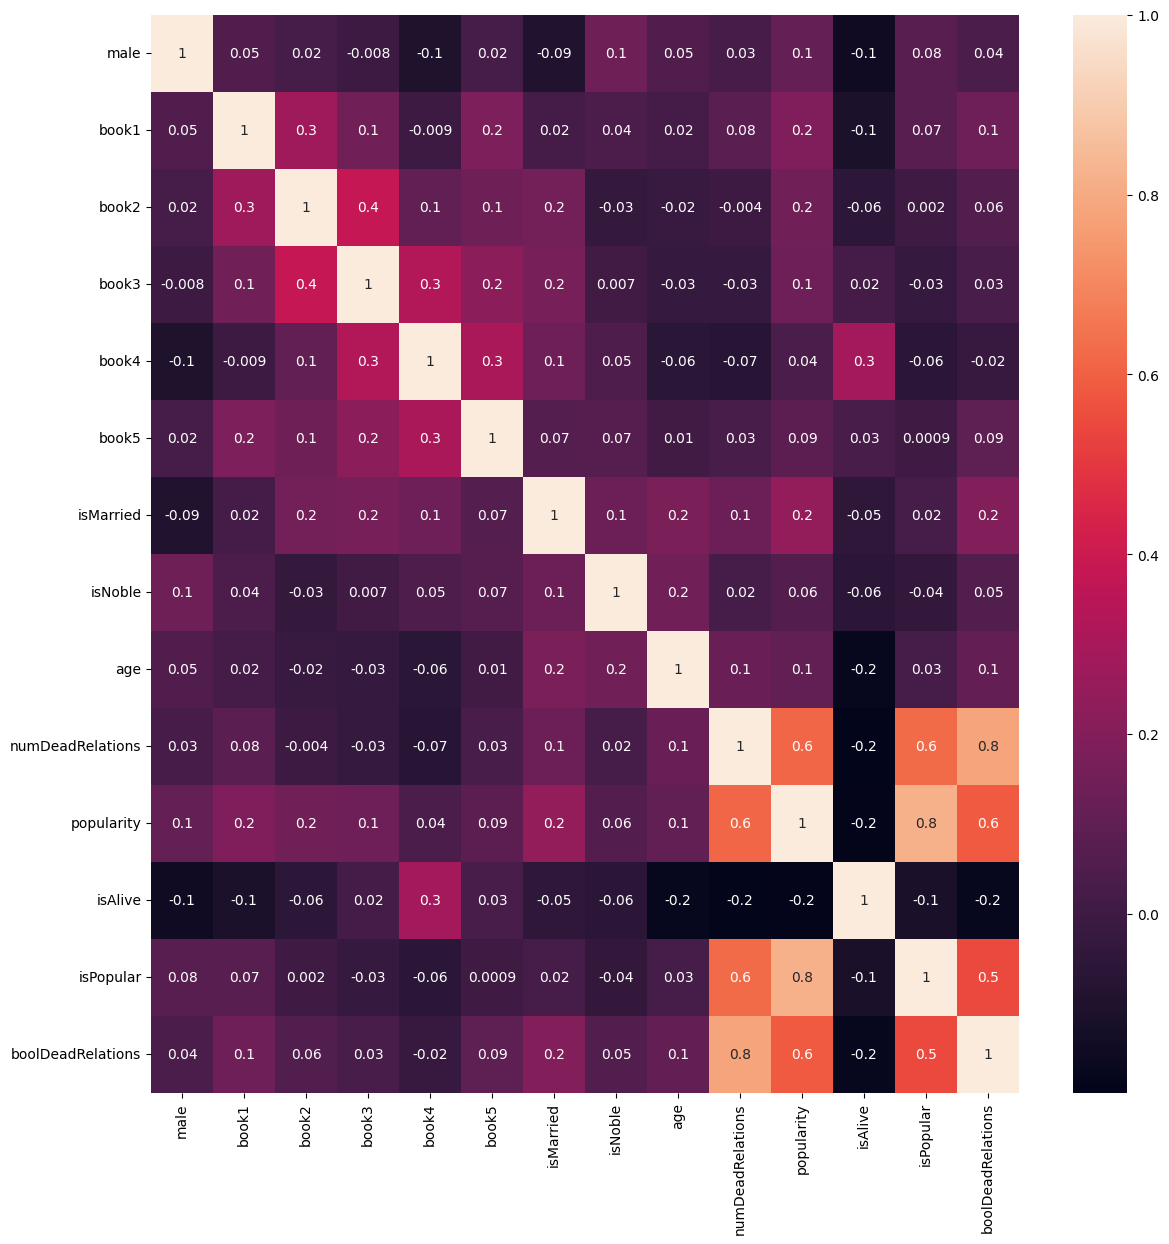

In [161]:

plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(numeric_only=True), annot = True, fmt='.1g')


In [162]:
data.drop(columns=['numDeadRelations','popularity'], inplace = True)
data

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,Dothraki,House Targaryen,0,0,0,0,0,0,0,24.0,0,1,1
2,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Addison Hill,1,Other,House Swyft,0,0,0,1,0,0,1,24.0,1,0,0
4,Aemma Arryn,0,Vale,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0
5,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,1,Dothraki,Other,1,0,1,1,0,0,1,24.0,1,0,0
1554,Masha Heddle,0,Dothraki,House Heddle,1,1,0,0,0,0,0,24.0,0,0,0
1555,Matthos Seaworth,1,Other,House Seaworth,0,1,1,1,1,0,0,24.0,0,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

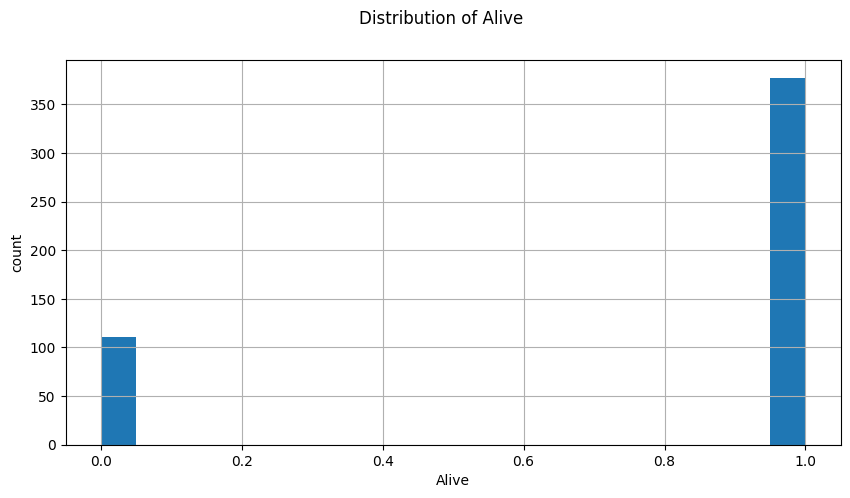

In [164]:
plt.figure(figsize = (10, 5))

df['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

In [163]:
dead=data[data['isAlive']==0]
alive=data[data['isAlive']==1]
from sklearn.utils import resample
spam_upsample = resample(dead,
             replace=True,
             n_samples=len(alive),
             random_state=42)
data_downsampled = pd.concat([alive, spam_upsample])
print(spam_upsample.shape)

(1212, 15)


In [165]:
data_downsampled = pd.concat([alive, spam_upsample])
data_downsampled

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
2,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1
3,Addison Hill,1,Other,House Swyft,0,0,0,1,0,0,1,24.0,1,0,0
5,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,0
6,Tommen Baratheon,1,Dothraki,House Baratheon,0,0,0,0,0,0,0,24.0,1,1,1
10,Wilbert Osgrey,1,Other,House Osgrey,0,0,0,0,0,0,1,24.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Monford Velaryon,1,Valyrian,House Velaryon,0,1,1,0,0,0,1,24.0,0,0,0
791,Mors Martell (brother of Doran),1,Dornish,House Martell,0,0,0,1,0,0,0,0.0,0,0,0
716,Lucan,1,Rivermen,House Whent,0,1,0,0,0,0,0,24.0,0,0,0


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [166]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
columns_to_encode = ['culture', 'house']
for column in columns_to_encode:
    data[column] = labelencoder.fit_transform(data[column])
data

,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,4,306,0,0,0,0,0,0,0,24.0,0,1,1
2,Walder Frey,1,13,120,1,1,1,1,1,1,1,97.0,1,1,1
3,Addison Hill,1,10,304,0,0,0,1,0,0,1,24.0,1,0,0
4,Aemma Arryn,0,18,22,0,0,0,0,0,1,1,23.0,0,0,0
5,Sylva Santagar,0,3,278,0,0,0,1,0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,1,4,378,1,0,1,1,0,0,1,24.0,1,0,0
1554,Masha Heddle,0,4,159,1,1,0,0,0,0,0,24.0,0,0,0
1555,Matthos Seaworth,1,10,281,0,1,1,1,1,0,0,24.0,0,0,0


In [167]:
categorical_columns = ['culture', 'house']
str_col = data[categorical_columns]
str_col.columns

Index(['culture', 'house'], dtype='object')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

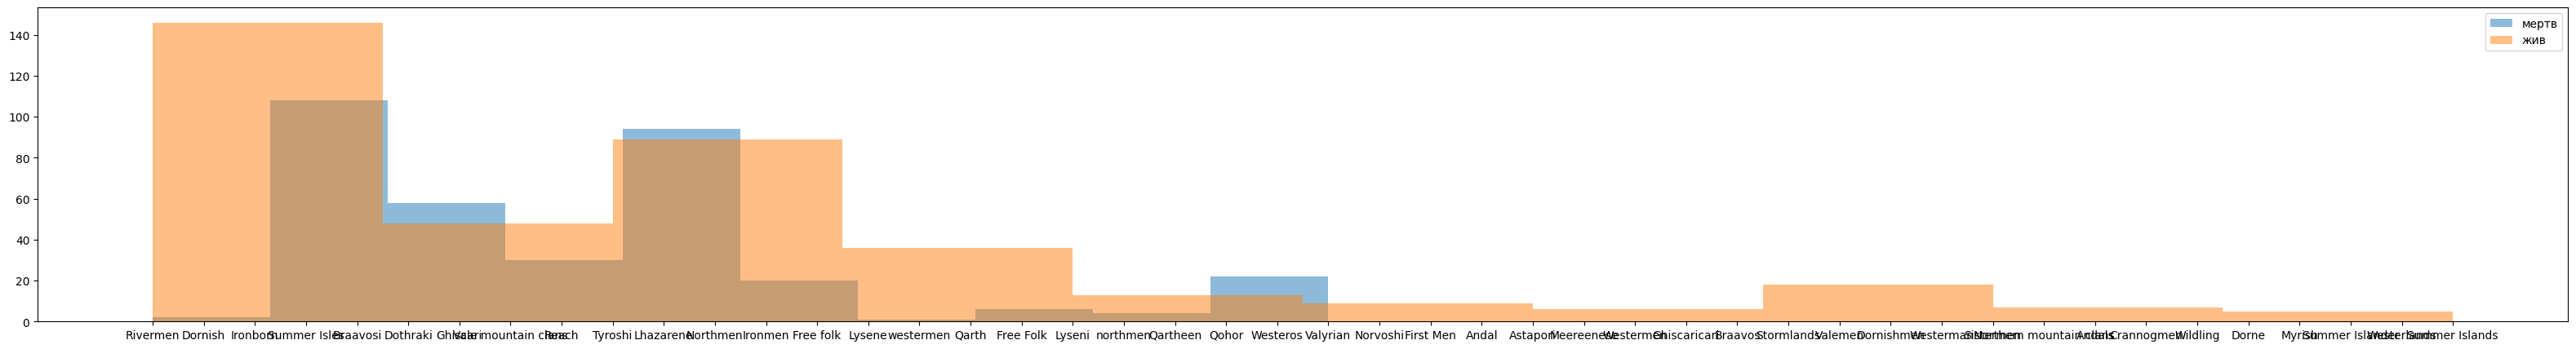

In [168]:
plt.figure(figsize=(40, 5))

plt.hist(data['culture'][data['isAlive'] == 0], alpha=0.5, label='мертв')
plt.hist(df['culture'][df['isAlive'] == 1], alpha=0.5, label='жив')

plt.legend()

plt.show()

In [170]:
data1 = data['culture'][data['isAlive'] == 0]
data2 = data['culture'][data['isAlive'] == 1]
data1.head()

,culture
S.No,
1,4
4,18
7,4
8,4
9,4


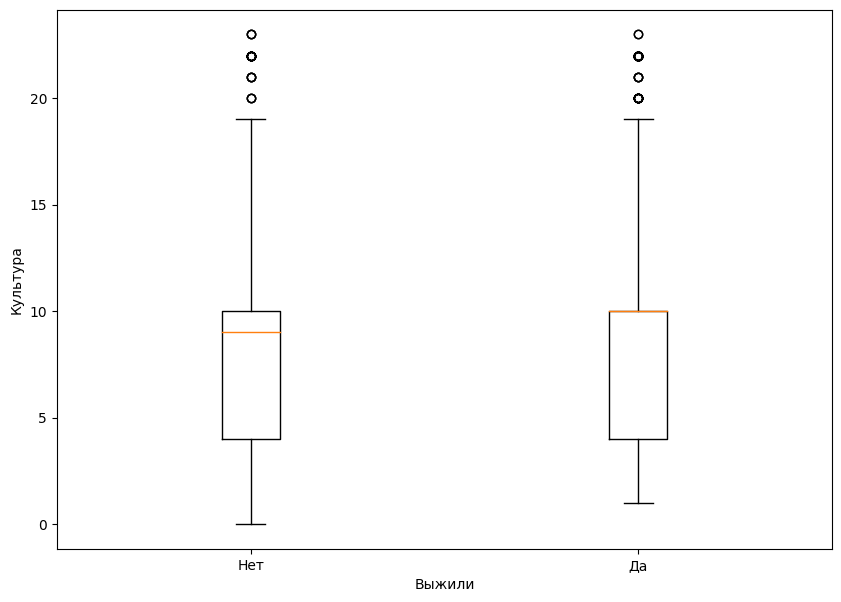

In [171]:
plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.xlabel('Выжили')
plt.ylabel('Культура')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [172]:
X = data.drop(columns=['isAlive','name']).values
y = data['isAlive'].values

In [ ]:
   pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks

In [ ]:
# весь код
data =  pd.read_csv("/content/drive/MyDrive/game_of_thrones_train.csv", index_col='S.No')
data.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)
df = data[data['culture'].notna()]
dict = pd.Series(df.culture.values,index=df.house).to_dict()
data["culture"] = data["house"].map(dict)
data['house'] = data['house'].fillna('Other')
age = data[data['age'].notna()]
data.loc[data['age'].isnull(), 'age']=age['age'].median()
data.drop(columns=['dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data['isPopular']=data['popularity'].apply(lambda x: '0' if x<=0.5 else '1')
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: '1' if x>0 else '0')
data['isPopular']=data['isPopular'].astype(int)
data['boolDeadRelations']=data['boolDeadRelations'].astype(int)
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
reversed_dict = {val.title(): key for key in cult for val in cult[key]}
data['culture'] = data['culture'].replace(reversed_dict)
data['culture'] = data['culture'].fillna('Other')
data.drop(columns=['numDeadRelations','popularity'], inplace = True)
data['title'] = data['title'].fillna('Other')

dead=data[data['isAlive']==0]
alive=data[data['isAlive']==1]
from sklearn.utils import resample
spam_upsample = resample(dead,
             replace=True,
             n_samples=len(alive),
             random_state=42)
data_downsampled = pd.concat([alive, spam_upsample])


# кодирование
labelencoder = LabelEncoder()
columns_to_encode = ['culture', 'house','title']
for column in columns_to_encode:
    data_downsampled[column] = labelencoder.fit_transform(data_downsampled[column])


data_downsampled['name']=data_downsampled['name'].apply(lambda x: len(x))


X = data_downsampled.drop(columns=['isAlive']).values
y = data_downsampled['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.model_selection import cross_val_score
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, solver='lbfgs', max_iter=400, n_jobs=-1)
scores = cross_val_score(logistic_regression, X_train, y_train, cv=8)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada_model=AdaBoostClassifier(n_estimators=50, learning_rate=1,algorithm='SAMME')
scores = cross_val_score(ada_model, X_train, y_train, cv=5)
# Шаг 2. обучение модели
ada_model=ada_model.fit(X_train,y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada_model.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion': ['gini', 'entropy', 'log_loss'],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [ ]:
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X_train, y_train, cv=5)
rfc = rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [ ]:
model = GaussianProcessClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)щ
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Шаг 1. создание модели
neigh = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(neigh, X_train, y_train, cv=5)
# Шаг 2. обучение модели
neigh.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = neigh.predict(X_test)

In [ ]:
s = SVC()
scores = cross_val_score(s, X_train, y_train, cv=5)
s.fit(X_train, y_train)
y_pred = s.predict(X_test)

In [ ]:
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [ ]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6716


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = ada_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6601


In [ ]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8977


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333


In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.5924


In [ ]:
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8069


In [ ]:
y_pred = s.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.5330


In [ ]:
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8762


Выберите лучшую модель.

In [126]:
data =  pd.read_csv("/content/drive/MyDrive/game_of_thrones_test.csv", index_col='S.No')
data.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)
df = data[data['culture'].notna()]
dict = pd.Series(df.culture.values,index=df.house).to_dict()
data["culture"] = data["house"].map(dict)

data['house'] = data['house'].fillna('Other')
age = data[data['age'].notna()]
data.loc[data['age'].isnull(), 'age']=age['age'].median()

data.drop(columns=['dateOfBirth', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data['isPopular']=data['popularity'].apply(lambda x: '0' if x<=0.5 else '1')
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: '1' if x>0 else '0')
data['isPopular']=data['isPopular'].astype(int)
data['boolDeadRelations']=data['boolDeadRelations'].astype(int)
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
reversed_dict = {val.title(): key for key in cult for val in cult[key]}
data['culture'] = data['culture'].replace(reversed_dict)
data['culture'] = data['culture'].fillna('Other')
data.drop(columns=['numDeadRelations','popularity'], inplace = True)
data['title'] = data['title'].fillna('Other')




# кодирование
labelencoder = LabelEncoder()
columns_to_encode = ['culture', 'house','title']
for column in columns_to_encode:
    data[column] = labelencoder.fit_transform(data[column])


data['name']=data['name'].apply(lambda x: len(x))


X = data.values
data


,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,17,76,0,15,22,0,0,0,0,1,0,0,100.0,0,0
1559,10,76,0,0,129,0,1,1,1,1,0,0,32.0,1,0
1560,6,76,0,22,6,0,0,1,1,0,0,0,32.0,0,0
1561,11,95,1,15,106,1,1,1,1,1,0,1,32.0,0,0
1562,12,76,1,19,50,1,1,1,1,1,1,0,38.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,5,76,1,27,95,1,1,1,1,1,0,0,32.0,0,0
1943,4,76,1,14,23,0,1,0,1,1,0,0,32.0,0,0
1944,16,76,1,5,128,1,1,1,1,1,0,0,32.0,0,0


In [127]:
y_pred = rfc.predict(X)

In [128]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [129]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 12.2MB/s]


In [130]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [131]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [132]:
submission['isAlive']=y_pred

In [133]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [134]:
submission.to_csv("/content/submission.csv")

In [135]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1
